<a href="https://colab.research.google.com/github/black26666/Data-Visualization-Projects/blob/main/pivot_charts_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab: Pivot Charts**


Estimated time needed: **30** minutes


## Introduction
In this lab, you will learn how to use pivot charts for data analysis. Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives

After completing this lab you will be able to:

 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`sqlite3`](https://docs.python.org/3/library/sqlite3.html) for accessing the database


### Installing Required Libraries

Execute the following code to install the required libraries on the interface


In [1]:
%pip install pandas seaborn

### Importing Required Libraries

All libraries required for the codes below should be imported here.


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

### Download the database
Download the databaset from the cloud server by executing the code statement below.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-29 16:50:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  22.0MB/s    in 1.6s    

2024-11-29 16:50:35 (22.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.


In [4]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)

### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


In the first task, you can plot a distribution of the distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. To achieve this, you can execute the code block shared below.


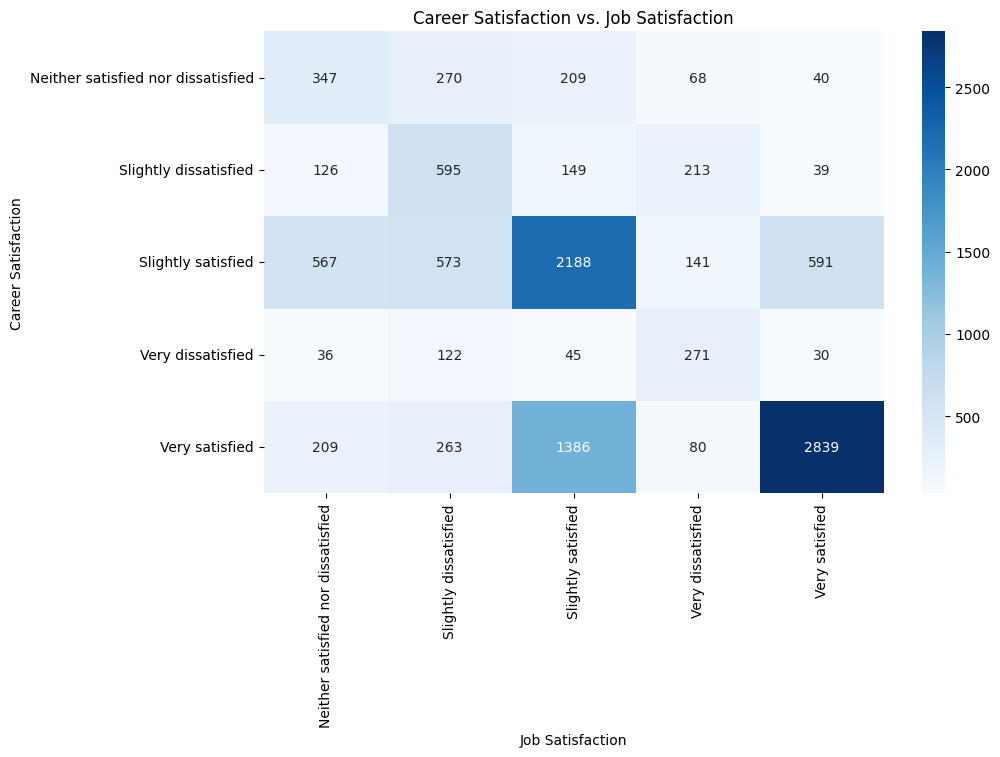

In [11]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, you can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

As a practice exercise, try to complete the code block below to generate the pivot chart yourself. Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


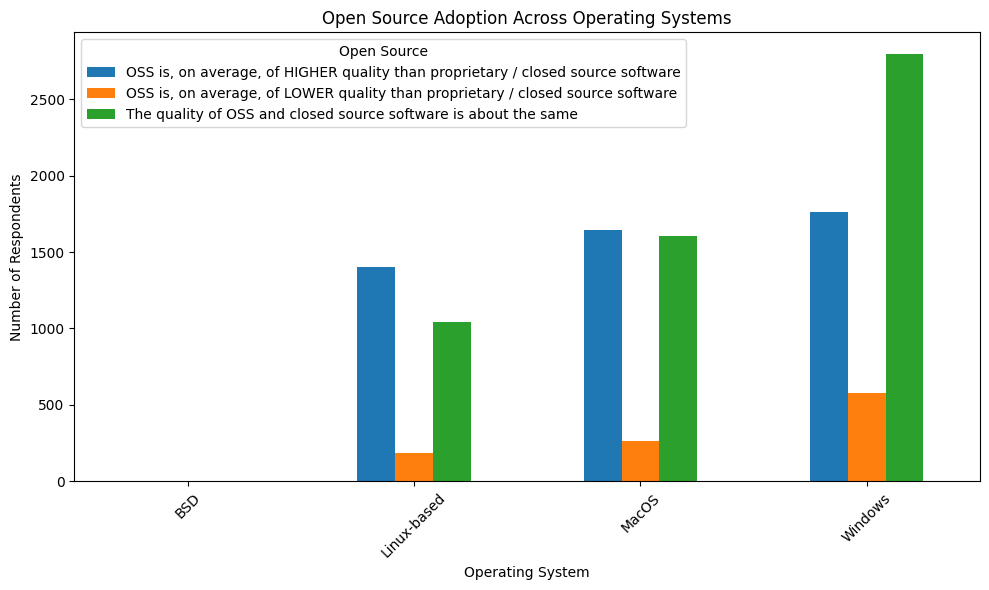

In [8]:
pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Open Source')
plt.tight_layout()
plt.show()

<details><Summary>Click here for the solution</Summary>

```python
pivot_table = pd.pivot_table(df, index='Opr', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()
```
</details>


### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, you can explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents.

For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. Complete the following code block to generate the said pivot chart.

Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


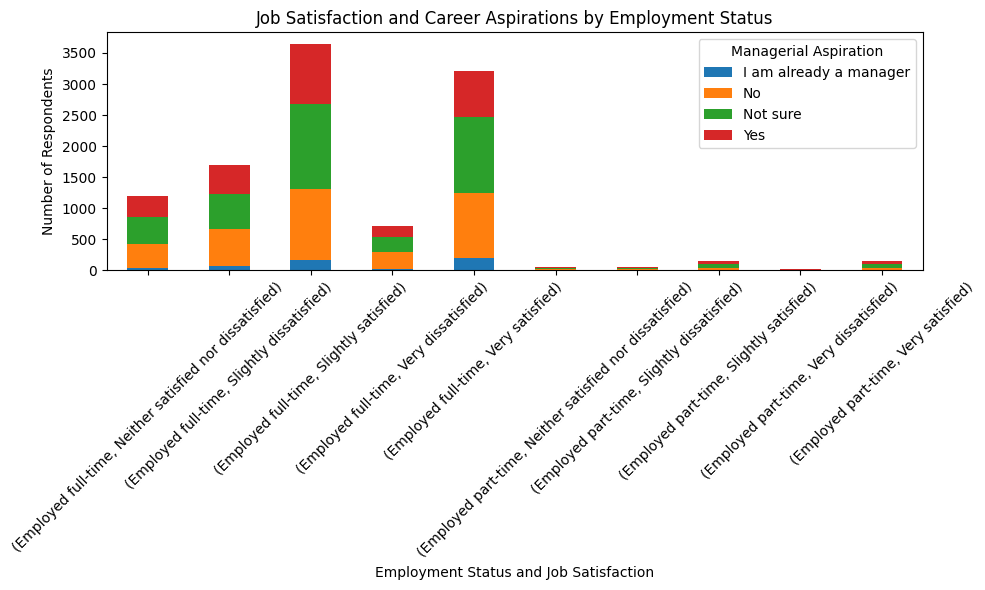

In [18]:
pivot_table = pd.pivot_table(df, index=['Employment','JobSat'], columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Job Satisfaction and Career Aspirations by Employment Status')
plt.xlabel('Employment Status and Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Managerial Aspiration')
plt.tight_layout()
plt.show()

<details><summary>Click here for solution</summary>

```python
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='RespondentID', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()
```
</details>


In [12]:
df.to_excel('./data.xlsx', index=False)

<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|>


Copyright © IBM Corporation. All rights reserved.
